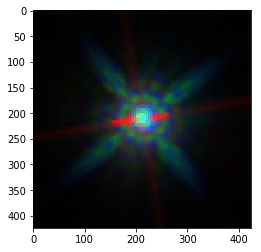

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm # for a nice progress bar

DATADIR = '/Users/lancastro/Desktop/Alice/test_data'
CATEGORIES = ["artifacts", "galaxies"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to the image dirs
    for img in os.listdir(path):
        #leaves the images unchanged and converts to array
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
        #displays image for checking
        plt.imshow(img_array)
        plt.show()
        #break to show the first image only
        break
    break

In [32]:
print(img_array.shape)

(424, 424)


The following adjusts the size/resolution of the image - the lower the number, the lower the resolution. This can be used to speed up computation time. In this case, the code is not needed, it's just here to show that if you want images the same size and resolution for a folder full of various images, this is what you do.

Also note that, when adjusting the image, the subject of the image might be a large or small fraction of the image (e.g. star takes up 3/4 of the image or it can take up 1/10 of the image), so adjust the resolution so that those images that takes up a very small fraction of the image can still be clear enough for classification.

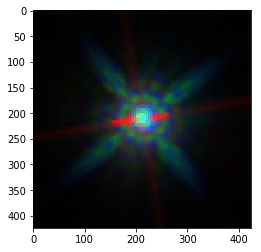

In [57]:
IMG_SIZE = 424

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

This is a messier version with comments to show what else you can do to your code. It, for some reason, runs, but doesn't work (freezes), so another one was copied from the example. 

In [60]:
def create_training_data():
    for category in CATEGORIES:
        
        path = os.path.join(DATADIR, category) # path to the image dirs
#         the following line randomly assigns a number as a label for each category
        class_num = CATEGORIES.index(category)
    
        for img in tqdm(os.listdir(path)):
            # the following is in try and exception because some images could be corrupted, 
            # so this prevents errors from corrupted images
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #converts images to array
#               this line would have gone here if image resizing was needed:
#               new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
#             the following shows the image as greyscale.
#             plt.imshow(img_array, cmap="gray")
#             plt.show()
            break
        break
        
create_training_data() 

  0%|          | 0/228 [00:00<?, ?it/s]


In [21]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

# This trains the NN.However, you will want to run this again, because currently you don't have any test 
# sets, all images are in the training set. 

create_training_data()

print(len(training_data))

100%|██████████| 26488/26488 [06:39<00:00, 74.03it/s]

26716


In [16]:
import random

random.shuffle(training_data)

In [20]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
1
1
1
1
1
